In [196]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from pandas import *
import seaborn as sns
from scipy.stats import norm, poisson, expon 
import statistics

# 1. Визуализация закона больших чисел

In [197]:
N = 400
n = 500

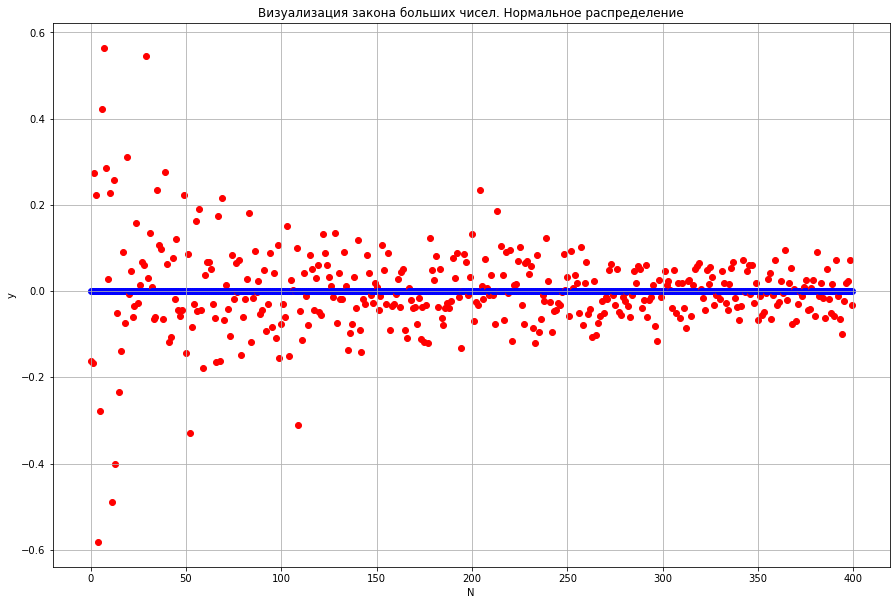

In [198]:
mu = 0
sigma = 1

fig = plt.figure(figsize=(15,10)) 

range_of_n = np.linspace(1, 500, N, dtype=int)

for i in range(0, N):
    sample = np.random.normal(mu, sigma, 10000)
    plt.scatter(i, np.mean(sample[:range_of_n[i]]), color='red')
    plt.scatter(i, mu, color='blue')
    
plt.title('Визуализация закона больших чисел. Нормальное распределение')
plt.xlabel("N")
plt.ylabel("y")
plt.grid(True)
plt.show()

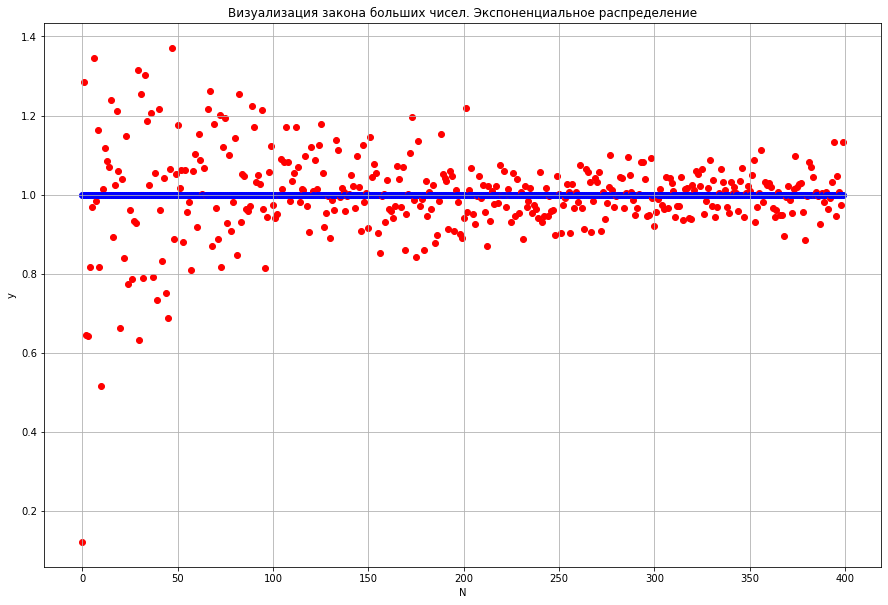

In [199]:
scale = 1.0 # scale = 1/lambda

fig = plt.figure(figsize=(15,10)) 

range_of_n = np.linspace(1, 500, N, dtype=int)

for i in range(0, N):
    sample = np.random.exponential(scale, 10000)
    plt.scatter(i, np.mean(sample[:range_of_n[i]]), color='red')
    plt.scatter(i, scale, color='blue')
    
plt.title('Визуализация закона больших чисел. Экспоненциальное распределение')
plt.xlabel("N")
plt.ylabel("y")
plt.grid(True)
plt.show()

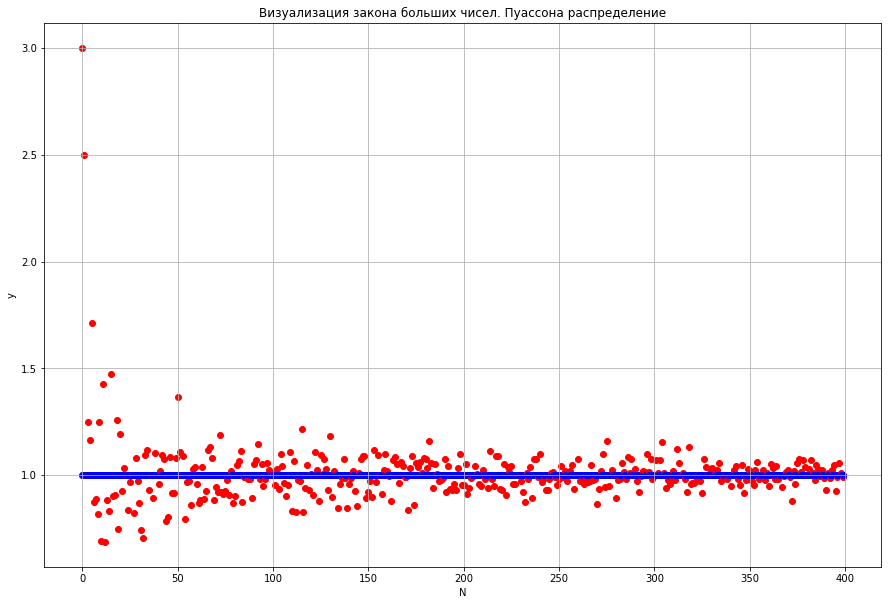

In [200]:
lam = 1.0

fig = plt.figure(figsize=(15,10)) 

range_of_n = np.linspace(1, 500, N, dtype=int)

for i in range(0, N):
    sample = np.random.poisson(lam, 10000)
    plt.scatter(i, np.mean(sample[:range_of_n[i]]), color='red')
    plt.scatter(i, lam, color='blue')
    
plt.title('Визуализация закона больших чисел. Пуассона распределение')
plt.xlabel("N")
plt.ylabel("y")
plt.grid(True)
plt.show()

# 2. Визуализация закона устойчивости относительных частот

Выпадение 12 очков при бросании 2-ух костей.

500


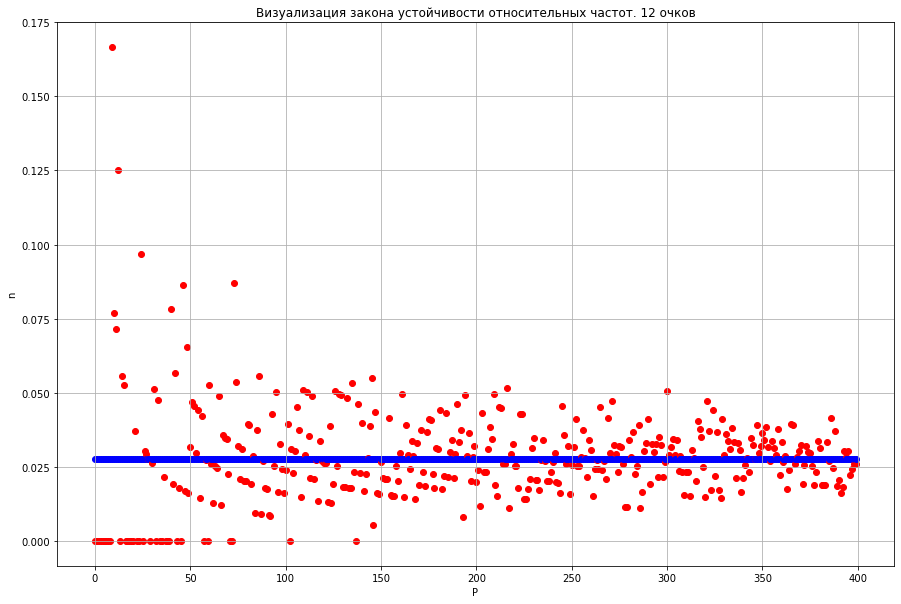

In [201]:
range_of_n = np.linspace(1, 500, N, dtype=int)
fig = plt.figure(figsize=(15,10)) 
for i in range (0, N):
    results = list()
    for n in range(0, 500):    
        first = np.random.randint(1, 7)
        second = np.random.randint(1, 7)
        sum = first + second
        results.append(sum)
    plt.scatter(i, results[:range_of_n[i]].count(12)/len(results[:range_of_n[i]]), color='red')
    plt.scatter(i, 1/36, color='blue')
    
print(len(results))
plt.title('Визуализация закона устойчивости относительных частот. 12 очков')
plt.xlabel("P")
plt.ylabel("n")
plt.grid(True)
plt.show()

# 3. Визуализация центральной предельной теоремы

In [202]:
N = 400
lam = 1.0

было выбрано пуассоновское распределение.

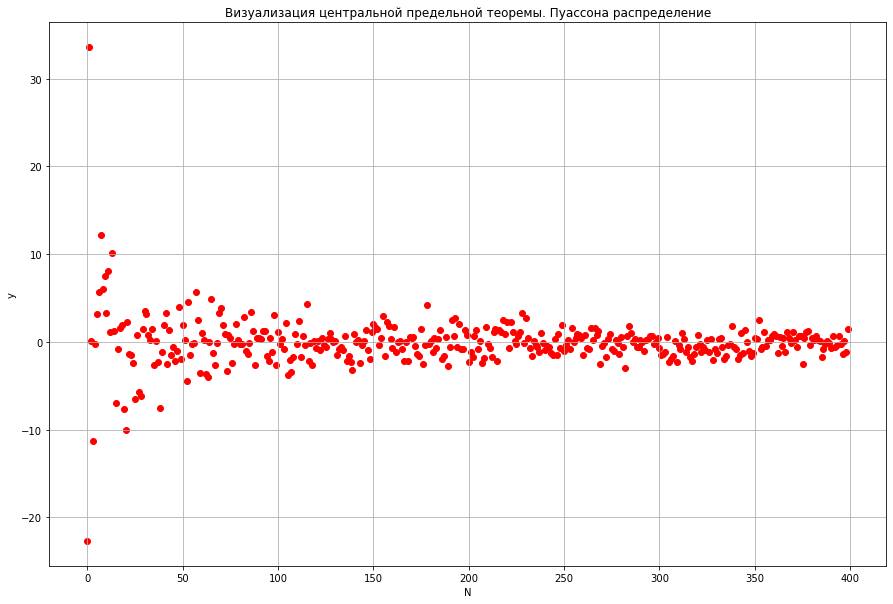

In [203]:
fig = plt.figure(figsize=(15,10)) 

range_of_n = np.linspace(1, 500, N, dtype=int)

for i in range(0, N):
    sample = np.random.poisson(lam, 10000)
    plt.scatter(i, np.sqrt(n)*((np.mean(sample[:range_of_n[i]])-np.mean(sample))/np.sqrt(np.var(sample))), color='red')
    
plt.title('Визуализация центральной предельной теоремы. Пуассона распределение')
plt.xlabel("N")
plt.ylabel("y")
plt.grid(True)
plt.show()

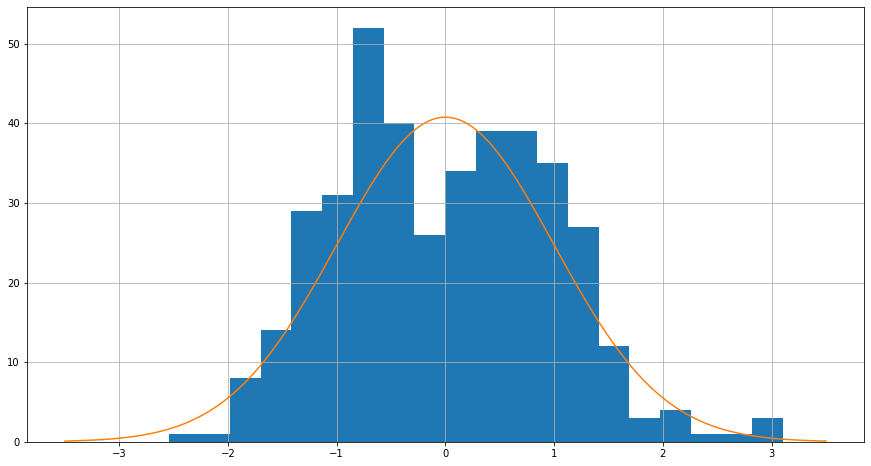

In [204]:
n = 10

hist = list()
for i in range(0, N):
    sample = np.random.poisson(lam, 10000)
    hist.append(np.sqrt(n)*((np.mean(sample[:10])-np.mean(sample))/np.sqrt(np.var(sample))))
    
fig = plt.figure(figsize=(15,8)) 

x = stats.norm.rvs(size=N)
num_bins = 20

plt.hist(hist, bins=num_bins)

y = np.linspace(-3.5, 3.5, 500)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y) * N * bin_width)

plt.grid(True)
plt.show()

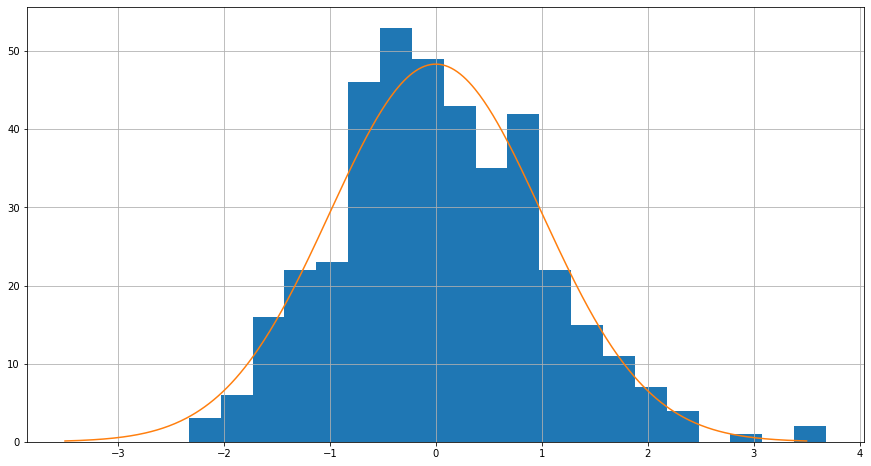

In [205]:
n = 100

hist = list()
for i in range(0, N):
    sample = np.random.poisson(lam, 10000)
    hist.append(np.sqrt(n)*((np.mean(sample[:100])-np.mean(sample))/np.sqrt(np.var(sample))))
    
fig = plt.figure(figsize=(15,8)) 

x = stats.norm.rvs(size=N)
num_bins = 20

plt.hist(hist, bins=num_bins)

y = np.linspace(-3.5, 3.5, 500)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y) * N * bin_width)

plt.grid(True)
plt.show()

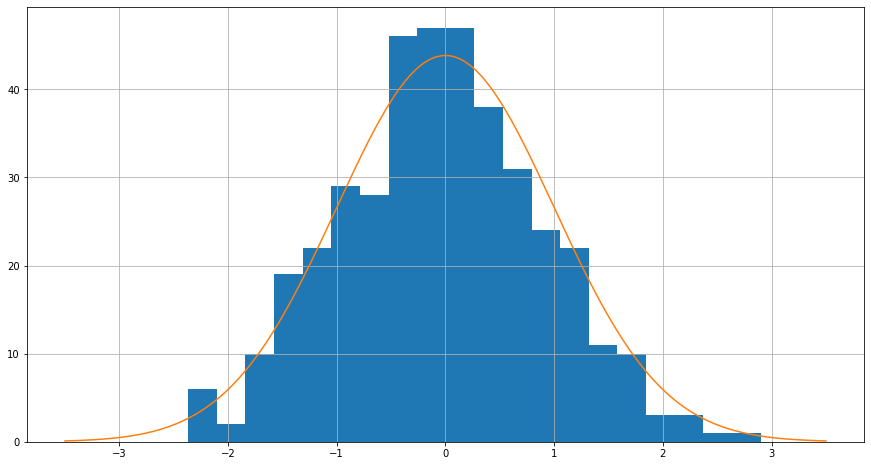

In [206]:
n = 500

hist = list()
for i in range(0, N):
    sample = np.random.poisson(lam, 10000)
    hist.append(np.sqrt(n)*((np.mean(sample[:500])-np.mean(sample))/(np.var(sample))))

fig = plt.figure(figsize=(15,8)) 

x = stats.norm.rvs(size=N)
num_bins = 20

plt.hist(hist, bins=num_bins)

y = np.linspace(-3.5, 3.5, 500)
bin_width = (x.max() - x.min()) / num_bins
plt.plot(y, stats.norm.pdf(y) * N * bin_width)

plt.grid(True)
plt.show()

### Сходится к нормальному стандартному распределению

# Элементы мат. статистики

Оценка мат.ожидания:  64.45333333333333
Оценка дисперсии:  72.0544888888889
Оценка S2:  72.29547380156076


<AxesSubplot:ylabel='Density'>

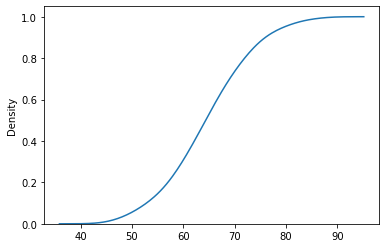

In [208]:
data = read_csv('Task4.csv')
sample = data['3'].tolist()

print("Оценка мат.ожидания: ", np.mean(sample))
print("Оценка дисперсии: ", np.var(sample))
print("Оценка S2: ", (300/299) *np.var(sample))

sns.kdeplot(sample, cumulative=True)

64.45333333333333 8.488491555564446


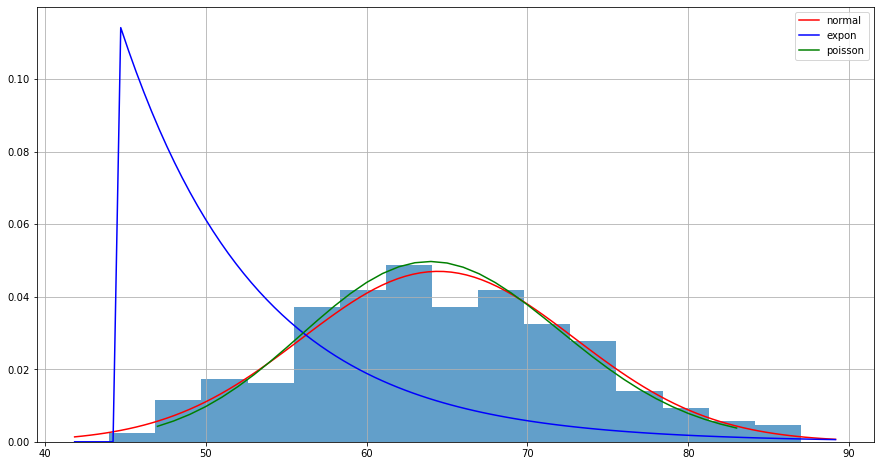

In [209]:
fig = plt.figure(figsize=(15,8)) 

num_bins = 15

plt.hist(sample, bins=num_bins, alpha=0.7, density=True)

mu, std = norm.fit(sample) 
print(mu, std)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'red', label="normal")
plt.plot(x, expon.pdf(x, mu-20, std), 'blue', label="expon")
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
plt.plot(x, poisson.pmf(x, mu), 'green', label="poisson")

plt.legend()
plt.grid(True)
plt.show()


### Это распределение Пуассона
СВ дискретна, mu большое -> распределение похоже на нормальное